In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

/home/alex/NuMI/PELEE/
Welcome to JupyROOT 6.24/02


In [2]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

noTune = False
MECTune = False

ending = "Dec19"
#ending = "Dec19_noTune"
#ending = "Dec19_MECTune"

In [3]:
if isRun3 == False and isCombined == False:
    nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_true_leptonMom_"+ending+".csv")
    nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_vars_tot = defaultdict(list)
    nue_nue_weights_tot = defaultdict(list)


    nue_nue_vars_tot = nue_nue_vars_tot_df.to_dict()
    nue_nue_weights_tot = nue_nue_weights_tot_df.to_dict()
    nue_nue_vars_tot.pop("Unnamed: 0")
    nue_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_weights_tot[c][0]) > 2:
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][1:]
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][:-1]
            nue_nue_weights_tot[c][0] = list(map(float,nue_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_vars_tot[c][0]) > 2:
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][1:]
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][:-1]
            nue_nue_vars_tot[c][0] = list(map(float,nue_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot.pop(i)
        nue_nue_weights_tot.pop(i)

    ###############################################################

    numu_mc_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_true_leptonMom_"+ending+".csv")
    numu_mc_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_vars_tot = defaultdict(list)
    numu_mc_weights_tot = defaultdict(list)


    numu_mc_vars_tot = numu_mc_vars_tot_df.to_dict()
    numu_mc_weights_tot = numu_mc_weights_tot_df.to_dict()
    numu_mc_vars_tot.pop("Unnamed: 0")
    numu_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_weights_tot[c][0]) > 2:
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][1:]
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][:-1]
            numu_mc_weights_tot[c][0] = list(map(float,numu_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_vars_tot[c][0]) > 2:
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][1:]
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][:-1]
            numu_mc_vars_tot[c][0] = list(map(float,numu_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot.pop(i)
        numu_mc_weights_tot.pop(i)

    ###############################################################
elif isRun3 == True and isCombined == False:
    nue_nue_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")
    nue_nue_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_vars_tot = defaultdict(list)
    nue_nue_weights_tot = defaultdict(list)


    nue_nue_vars_tot = nue_nue_vars_tot_df.to_dict()
    nue_nue_weights_tot = nue_nue_weights_tot_df.to_dict()
    nue_nue_vars_tot.pop("Unnamed: 0")
    nue_nue_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_weights_tot[c][0]) > 2:
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][1:]
            nue_nue_weights_tot[c][0] = nue_nue_weights_tot[c][0][:-1]
            nue_nue_weights_tot[c][0] = list(map(float,nue_nue_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot.keys():
        if len(nue_nue_vars_tot[c][0]) > 2:
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][1:]
            nue_nue_vars_tot[c][0] = nue_nue_vars_tot[c][0][:-1]
            nue_nue_vars_tot[c][0] = list(map(float,nue_nue_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot.pop(i)
        nue_nue_weights_tot.pop(i)

    ###############################################################

    numu_mc_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")
    numu_mc_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_vars_tot = defaultdict(list)
    numu_mc_weights_tot = defaultdict(list)


    numu_mc_vars_tot = numu_mc_vars_tot_df.to_dict()
    numu_mc_weights_tot = numu_mc_weights_tot_df.to_dict()
    numu_mc_vars_tot.pop("Unnamed: 0")
    numu_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_weights_tot[c][0]) > 2:
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][1:]
            numu_mc_weights_tot[c][0] = numu_mc_weights_tot[c][0][:-1]
            numu_mc_weights_tot[c][0] = list(map(float,numu_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot.keys():
        if len(numu_mc_vars_tot[c][0]) > 2:
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][1:]
            numu_mc_vars_tot[c][0] = numu_mc_vars_tot[c][0][:-1]
            numu_mc_vars_tot[c][0] = list(map(float,numu_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot.pop(i)
        numu_mc_weights_tot.pop(i)

    ###############################################################
elif isCombined == True:
    nue_nue_vars_tot_df_run1 = pd.read_csv("nue_nue_varstot_full_catsel_nopions_true_leptonMom_"+ending+".csv")
    nue_nue_weights_tot_df_run1 = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_vars_tot_run1 = defaultdict(list)
    nue_nue_weights_tot_run1 = defaultdict(list)


    nue_nue_vars_tot_run1 = nue_nue_vars_tot_df_run1.to_dict()
    nue_nue_weights_tot_run1 = nue_nue_weights_tot_df_run1.to_dict()
    nue_nue_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot_run1.keys():
        if len(nue_nue_weights_tot_run1[c][0]) > 2:
            nue_nue_weights_tot_run1[c][0] = nue_nue_weights_tot_run1[c][0][1:]
            nue_nue_weights_tot_run1[c][0] = nue_nue_weights_tot_run1[c][0][:-1]
            nue_nue_weights_tot_run1[c][0] = list(map(float,nue_nue_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot_run1.keys():
        if len(nue_nue_vars_tot_run1[c][0]) > 2:
            nue_nue_vars_tot_run1[c][0] = nue_nue_vars_tot_run1[c][0][1:]
            nue_nue_vars_tot_run1[c][0] = nue_nue_vars_tot_run1[c][0][:-1]
            nue_nue_vars_tot_run1[c][0] = list(map(float,nue_nue_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot_run1.pop(i)
        nue_nue_weights_tot_run1.pop(i)

    ###############################################################

    numu_mc_vars_tot_df_run1 = pd.read_csv("numu_mc_varstot_full_catsel_nopions_true_leptonMom_"+ending+".csv")
    numu_mc_weights_tot_df_run1 = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_vars_tot_run1 = defaultdict(list)
    numu_mc_weights_tot_run1= defaultdict(list)


    numu_mc_vars_tot_run1 = numu_mc_vars_tot_df_run1.to_dict()
    numu_mc_weights_tot_run1 = numu_mc_weights_tot_df_run1.to_dict()
    numu_mc_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot_run1.keys():
        if len(numu_mc_weights_tot_run1[c][0]) > 2:
            numu_mc_weights_tot_run1[c][0] = numu_mc_weights_tot_run1[c][0][1:]
            numu_mc_weights_tot_run1[c][0] = numu_mc_weights_tot_run1[c][0][:-1]
            numu_mc_weights_tot_run1[c][0] = list(map(float,numu_mc_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot_run1.keys():
        if len(numu_mc_vars_tot_run1[c][0]) > 2:
            numu_mc_vars_tot_run1[c][0] = numu_mc_vars_tot_run1[c][0][1:]
            numu_mc_vars_tot_run1[c][0] = numu_mc_vars_tot_run1[c][0][:-1]
            numu_mc_vars_tot_run1[c][0] = list(map(float,numu_mc_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot_run1.pop(i)
        numu_mc_weights_tot_run1.pop(i)

    ###############################################################
    nue_nue_vars_tot_df_run3 = pd.read_csv("nue_nue_varstot_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")
    nue_nue_weights_tot_df_run3 = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_vars_tot_run3 = defaultdict(list)
    nue_nue_weights_tot_run3 = defaultdict(list)


    nue_nue_vars_tot_run3 = nue_nue_vars_tot_df_run3.to_dict()
    nue_nue_weights_tot_run3 = nue_nue_weights_tot_df_run3.to_dict()
    nue_nue_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_vars_tot_run3.keys():
        if len(nue_nue_weights_tot_run3[c][0]) > 2:
            nue_nue_weights_tot_run3[c][0] = nue_nue_weights_tot_run3[c][0][1:]
            nue_nue_weights_tot_run3[c][0] = nue_nue_weights_tot_run3[c][0][:-1]
            nue_nue_weights_tot_run3[c][0] = list(map(float,nue_nue_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_vars_tot_run3.keys():
        if len(nue_nue_vars_tot_run3[c][0]) > 2:
            nue_nue_vars_tot_run3[c][0] = nue_nue_vars_tot_run3[c][0][1:]
            nue_nue_vars_tot_run3[c][0] = nue_nue_vars_tot_run3[c][0][:-1]
            nue_nue_vars_tot_run3[c][0] = list(map(float,nue_nue_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_vars_tot_run3.pop(i)
        nue_nue_weights_tot_run3.pop(i)

    ###############################################################

    numu_mc_vars_tot_df_run3 = pd.read_csv("numu_mc_varstot_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")
    numu_mc_weights_tot_df_run3 = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_vars_tot_run3 = defaultdict(list)
    numu_mc_weights_tot_run3 = defaultdict(list)


    numu_mc_vars_tot_run3 = numu_mc_vars_tot_df_run3.to_dict()
    numu_mc_weights_tot_run3 = numu_mc_weights_tot_df_run3.to_dict()
    numu_mc_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_vars_tot_run3.keys():
        if len(numu_mc_weights_tot_run3[c][0]) > 2:
            numu_mc_weights_tot_run3[c][0] = numu_mc_weights_tot_run3[c][0][1:]
            numu_mc_weights_tot_run3[c][0] = numu_mc_weights_tot_run3[c][0][:-1]
            numu_mc_weights_tot_run3[c][0] = list(map(float,numu_mc_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_vars_tot_run3.keys():
        if len(numu_mc_vars_tot_run3[c][0]) > 2:
            numu_mc_vars_tot_run3[c][0] = numu_mc_vars_tot_run3[c][0][1:]
            numu_mc_vars_tot_run3[c][0] = numu_mc_vars_tot_run3[c][0][:-1]
            numu_mc_vars_tot_run3[c][0] = list(map(float,numu_mc_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_vars_tot_run3.pop(i)
        numu_mc_weights_tot_run3.pop(i)

    ###############################################################

In [4]:
if isRun3 == False and isCombined == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_stat_errs)):
        nue_nue_stat_errs[a] = float(nue_nue_stat_errs[a][0])

    print("nue_nue_stat_errs = ", nue_nue_stat_errs)


    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_stat_errs)):
        numu_mc_stat_errs[a] = float(numu_mc_stat_errs[a][0])

    print("numu_mc_stat_errs = ", numu_mc_stat_errs)


    ###################################################
elif isRun3 == True and isCombined == False:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_stat_errs)):
        nue_nue_stat_errs[a] = float(nue_nue_stat_errs[a][0])

    print("nue_nue_stat_errs = ", nue_nue_stat_errs)


    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_stat_errs)):
        numu_mc_stat_errs[a] = float(numu_mc_stat_errs[a][0])

    print("numu_mc_stat_errs = ", numu_mc_stat_errs)

    ###################################################
elif isCombined == True:
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_run1)):
        nue_nue_stat_errs_run1[a] = float(nue_nue_stat_errs_run1[a][0])

    print("nue_nue_stat_errs_run1 = ", nue_nue_stat_errs_run1)


    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_run1)):
        numu_mc_stat_errs_run1[a] = float(numu_mc_stat_errs_run1[a][0])

    print("numu_mc_stat_errs_run1 = ", numu_mc_stat_errs_run1)


    ###################################################
    with open('nue_nue_stat_errs_updated_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_stat_errs_run3)):
        nue_nue_stat_errs_run3[a] = float(nue_nue_stat_errs_run3[a][0])

    print("nue_nue_stat_errs_run3 = ", nue_nue_stat_errs_run3)


    ################################################

    with open('numu_mc_stat_errs_updated_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_stat_errs_run3)):
        numu_mc_stat_errs_run3[a] = float(numu_mc_stat_errs_run3[a][0])

    print("numu_mc_stat_errs_run3 = ", numu_mc_stat_errs_run3)

    ###################################################

nue_nue_stat_errs_run1 =  [1.1514689318778026, 1.7789958928744805, 1.6914812824290253, 1.247221374879181, 0.6668928696910437, 0.38353440879015205, 0.16970544904403875, 0.3242227569061061]
numu_mc_stat_errs_run1 =  [490.6001977638601, 272.67600322520207, 216.02640112936353, 183.3730582253368, 131.1531886601979, 102.0727039488044, 54.69452039282863, 90.67863319477132]
nue_nue_stat_errs_run3 =  [4.733147421054917, 6.877756140764197, 6.4966398071864315, 5.0188822246825415, 2.9372398588935944, 1.8581524318164022, 1.3304030744391766, 3.0340905778541987]
numu_mc_stat_errs_run3 =  [2453.8230609404245, 2013.7394744895885, 1832.7832701511666, 1167.2711001347636, 777.9467040111828, 464.74053697635054, 263.1132030715414, 921.4469169508287]


In [5]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)

    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse
    
    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    print(len(final_ns[0]))
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    for n_tot_pair in final_ns:
        tempCov = np.zeros([len(n_tot_pair[0]), len(n_tot_pair[1])])
        for n in n_tot_pair:
            for i in range(len(n_tot_pair[0])):
                for j in range(len(n_tot_pair[1])):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

In [6]:
if isRun3 == False and isCombined == False:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
elif isRun3 == True and isCombined == False:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)
elif isCombined == True:
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx_run1 = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx_run1 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie_run1 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie_run1 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint_run1 = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint_run1 = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo_run1 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo_run1 = list(csv_reader)    



    cov_nue_nue_ppfx_run1 = get_cov_matrix(nue_nue_final_ns_ppfx_run1, nue_nue_final_ncvs_ppfx_run1, 500)
    cov_nue_nue_genie_run1 = get_cov_matrix(nue_nue_final_ns_genie_run1, nue_nue_final_ncvs_genie_run1, 500)
    cov_nue_nue_reint_run1 = get_cov_matrix(nue_nue_final_ns_reint_run1, nue_nue_final_ncvs_reint_run1, 500)
    cov_nue_nue_geo_run1 = get_geo_cov_matrix(nue_nue_final_ns_geo_run1, nue_nue_final_ncvs_geo_run1)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx_run1 = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx_run1 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie_run1 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint_run1 = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo_run1 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_true_leptonMom_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo_run1 = list(csv_reader)    



    cov_numu_mc_ppfx_run1 = get_cov_matrix(numu_mc_final_ns_ppfx_run1, numu_mc_final_ncvs_ppfx_run1, 500)
    cov_numu_mc_genie_run1 = get_cov_matrix(numu_mc_final_ns_genie_run1, numu_mc_final_ncvs_genie_run1, 500)
    cov_numu_mc_reint_run1 = get_cov_matrix(numu_mc_final_ns_reint_run1, numu_mc_final_ncvs_reint_run1, 500)
    cov_numu_mc_geo_run1 = get_geo_cov_matrix(numu_mc_final_ns_geo_run1, numu_mc_final_ncvs_geo_run1)
    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx_run3 = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx_run3 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie_run3 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie_run3 = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint_run3 = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint_run3 = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo_run3 = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo_run3 = list(csv_reader)    



    cov_nue_nue_ppfx_run3 = get_cov_matrix(nue_nue_final_ns_ppfx_run3, nue_nue_final_ncvs_ppfx_run3, 500)
    cov_nue_nue_genie_run3 = get_cov_matrix(nue_nue_final_ns_genie_run3, nue_nue_final_ncvs_genie_run3, 500)
    cov_nue_nue_reint_run3 = get_cov_matrix(nue_nue_final_ns_reint_run3, nue_nue_final_ncvs_reint_run3, 500)
    cov_nue_nue_geo_run3 = get_geo_cov_matrix(nue_nue_final_ns_geo_run3, nue_nue_final_ncvs_geo_run3)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx_run3 = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx_run3 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie_run3 = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint_run3 = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo_run3 = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_true_leptonMom_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo_run3 = list(csv_reader)    



    cov_numu_mc_ppfx_run3 = get_cov_matrix(numu_mc_final_ns_ppfx_run3, numu_mc_final_ncvs_ppfx_run3, 500)
    cov_numu_mc_genie_run3 = get_cov_matrix(numu_mc_final_ns_genie_run3, numu_mc_final_ncvs_genie_run3, 500)
    cov_numu_mc_reint_run3 = get_cov_matrix(numu_mc_final_ns_reint_run3, numu_mc_final_ncvs_reint_run3, 500)
    cov_numu_mc_geo_run3 = get_geo_cov_matrix(numu_mc_final_ns_geo_run3, numu_mc_final_ncvs_geo_run3)

16
16
16
16


In [7]:
if isRun3 == False and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
elif isRun3 == True and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_true_angleDiff_run3_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   

    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
elif isCombined == True:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_ppfx_run1 = nue_nue_df_ppfx_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_ppfx_vars_run1 = nue_nue_df_ppfx_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines_run1 = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_ppfx_splines_run1 = nue_nue_df_ppfx_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_ppfx_run1 = numu_mc_df_ppfx_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_ppfx_vars_run1 = numu_mc_df_ppfx_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines_run1 = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_ppfx_splines_run1 = numu_mc_df_ppfx_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie_run1 = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_genie_run1 = nue_nue_df_genie_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars_run1 = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_genie_vars_run1 = nue_nue_df_genie_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines_run1 = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_genie_splines_run1 = nue_nue_df_genie_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie_run1 = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_genie_run1 = numu_mc_df_genie_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars_run1 = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_genie_vars_run1 = numu_mc_df_genie_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines_run1 = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_genie_splines_run1 = numu_mc_df_genie_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint_run1 = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_reint_run1 = nue_nue_df_reint_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars_run1 = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_reint_vars_run1 = nue_nue_df_reint_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines_run1 = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_reint_splines_run1 = nue_nue_df_reint_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint_run1 = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_reint_run1 = numu_mc_df_reint_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars_run1 = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_reint_vars_run1 = numu_mc_df_reint_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines_run1 = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_reint_splines_run1 = numu_mc_df_reint_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo_run1 = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_geo_run1 = nue_nue_df_geo_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars_run1 = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_geo_vars_run1 = nue_nue_df_geo_vars_run1.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines_run1 = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    nue_nue_df_geo_splines_run1 = nue_nue_df_geo_splines_run1.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo_run1 = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_geo_run1 = numu_mc_df_geo_run1.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars_run1 = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_geo_vars_run1 = numu_mc_df_geo_vars_run1.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines_run1 = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_true_leptonMom_"+ending+".csv")

    numu_mc_df_geo_splines_run1 = numu_mc_df_geo_splines_run1.set_index('entry')
    #print(nue_nue_df_ppfx_splines)
    
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_ppfx_run3 = nue_nue_df_ppfx_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars_run3 = nue_nue_df_ppfx_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines_run3 = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines_run3 = nue_nue_df_ppfx_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_ppfx_run3 = numu_mc_df_ppfx_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars_run3 = numu_mc_df_ppfx_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines_run3 = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines_run3 = numu_mc_df_ppfx_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie_run3 = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_genie_run3 = nue_nue_df_genie_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars_run3 = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_genie_vars_run3 = nue_nue_df_genie_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines_run3 = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_genie_splines_run3 = nue_nue_df_genie_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_genie_run3 = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_genie_run3 = numu_mc_df_genie_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars_run3 = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_genie_vars_run3 = numu_mc_df_genie_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines_run3 = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_genie_splines_run3 = numu_mc_df_genie_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint_run3 = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_reint_run3 = nue_nue_df_reint_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars_run3 = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_reint_vars_run3 = nue_nue_df_reint_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines_run3 = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_reint_splines_run3 = nue_nue_df_reint_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint_run3 = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_reint_run3 = numu_mc_df_reint_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars_run3 = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_reint_vars_run3= numu_mc_df_reint_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines_run3 = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_reint_splines_run3= numu_mc_df_reint_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo_run3 = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_geo_run3 = nue_nue_df_geo_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars_run3 = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_geo_vars_run3 = nue_nue_df_geo_vars_run3.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines_run3 = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    nue_nue_df_geo_splines_run3 = nue_nue_df_geo_splines_run3.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo_run3 = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_geo_run3 = numu_mc_df_geo_run3.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars_run3 = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_geo_vars_run3 = numu_mc_df_geo_vars_run3.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines_run3 = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_true_leptonMom_run3_"+ending+".csv")

    numu_mc_df_geo_splines_run3 = numu_mc_df_geo_splines_run3.set_index('entry')
    #print(nue_nue_df_ppfx_splines)


## Plot Nue

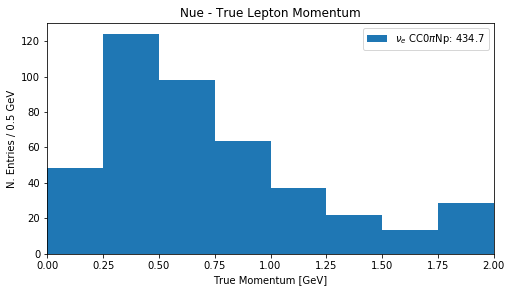

In [60]:
if isCombined == False:
    category_labels = {
        1 : r'$\nu_e$ CC0$\pi$Np', 
        2 : r'Out FV',
        3 : r'$\nu_\mu$ CC $\pi^{0}$',
        4 : r'$\nu_\mu$ CC',
        5 : r'$\nu_\mu$ NC $\pi^{0}$',
        6 : r'$\nu_\mu$ NC',
        7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
        8: r'$\nu_e$ NC',
        9: r'$\nu_e$ CC other',
        10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
        11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
        12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
        0: r'Unknown'
    }



    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(nue_nue_weights_tot[str(c)][0])) \
                if sum(nue_nue_weights_tot[str(c)][0]) else ""
                for c in nue_nue_vars_tot.keys()
            ]


    pup = list(nue_nue_vars_tot.values())

    i = 0
    for c in nue_nue_vars_tot.keys():
        nue_nue_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(nue_nue_weights_tot.values())

    i = 0
    for c in nue_nue_weights_tot.keys():
        nue_nue_weights_tot[str(c)] = pup2[i][0]
        i = i + 1



    nue_fig = plt.figure(figsize=(8, 7))
    nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    nue_ax1 = plt.subplot(nue_gs[0])
    nue_ax1.set_xlim([0, 2])

    VARIABLE, BINS, RANGE, XTIT = 'target_P',8,(0.0, 2.0),"True Energy [GeV]"

    nue_stacked = nue_ax1.hist(
                nue_nue_vars_tot.values(),
                weights=list(nue_nue_weights_tot.values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)

    n_nue_tot = nue_stacked[0]

    plt.title("Nue - True Lepton Momentum")
    plt.xlabel("True Momentum [GeV]")
    plt.ylabel("N. Entries / 0.5 GeV")
    plt.legend()

In [61]:
if isCombined == False:
    import importlib
    import Plotter_Functions_Alex
    importlib.reload(Plotter_Functions_Alex)
    from Plotter_Functions_Alex import getWantedLists
    importlib.reload(getWantedLists)

    #print(nue_stacked)

    #wanted_key = 5

    #nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)

    nue_wanted_list = n_nue_tot
    print(nue_wanted_list)

[ 48.22926162 123.92267406  97.80040563  63.64777416  36.91722153
  21.99581918  13.3538792   28.82391511]


In [62]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = nue_wanted_list

print(prior_true_signal)
print(sum(prior_true_signal))

[ 48.22926162 123.92267406  97.80040563  63.64777416  36.91722153
  21.99581918  13.3538792   28.82391511]
434.6909504720284


In [63]:
if isCombined == False and isRun3 == False:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_recoCut_run1_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')

## Now do Numu

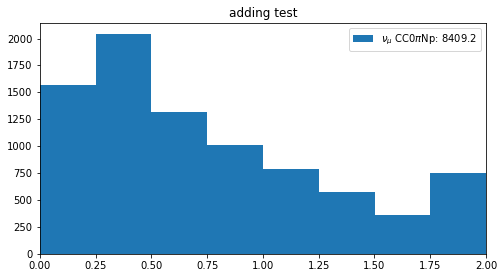

In [64]:
if isCombined == False:
    category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
    }


    labels = [
                "%s: %.1f" % (category_labels[int(c)], sum(numu_mc_weights_tot[str(c)][0])) \
                if sum(numu_mc_weights_tot[str(c)][0]) else ""
                for c in numu_mc_vars_tot.keys()
            ]


    pup = list(numu_mc_vars_tot.values())

    i = 0
    for c in numu_mc_vars_tot.keys():
        numu_mc_vars_tot[str(c)] = pup[i][0]
        i = i + 1

    pup2 = list(numu_mc_weights_tot.values())

    i = 0
    for c in numu_mc_weights_tot.keys():
        numu_mc_weights_tot[str(c)] = pup2[i][0]
        i = i + 1



    numu_fig = plt.figure(figsize=(8, 7))
    numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
    numu_ax1 = plt.subplot(numu_gs[0])
    numu_ax1.set_xlim([0, 2])
    #numu_ax1.set_ylim([0, 14000])

    VARIABLE, BINS, RANGE, XTIT = 'targetP',8,(0.0, 2.0),"True Energy [GeV]"

    numu_stacked = numu_ax1.hist(
                numu_mc_vars_tot.values(),
                weights=list(numu_mc_weights_tot.values()),
                stacked=True,
                label=labels,
                bins=BINS,
                range=RANGE)

    n_numu_tot = numu_stacked[0]

    plt.title("adding test")
    plt.legend()

In [65]:
if isCombined == False:
    import importlib
    import Plotter_Functions_Alex
    importlib.reload(Plotter_Functions_Alex)
    from Plotter_Functions_Alex import getWantedLists
    importlib.reload(getWantedLists)


    #wanted_key = 4

    #numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

    numu_wanted_list = n_numu_tot

In [66]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = nue_wanted_list

print(prior_true_signal)
print(sum(prior_true_signal))

[ 48.22926162 123.92267406  97.80040563  63.64777416  36.91722153
  21.99581918  13.3538792   28.82391511]
434.6909504720284


In [67]:
if isCombined == False and isRun3 == False:
    np.savetxt("numu_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_recoCut_run1_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')

## Make a Combined Plot

[129.34660346 337.72963718 266.63605758 184.86843883 116.20225572
  75.70418197  51.82313326 134.8144814 ]


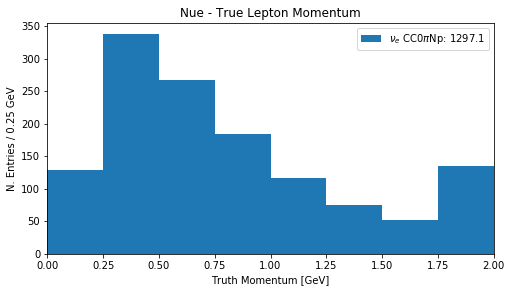

In [8]:
#################
####NUE#########
#################

category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


########################################
pup = list(nue_nue_vars_tot_run1.values())

i = 0
for c in nue_nue_vars_tot_run1.keys():
    nue_nue_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_run1.values())

i = 0
for c in nue_nue_weights_tot_run1.keys():
    nue_nue_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
############################################# 
pup = list(nue_nue_vars_tot_run3.values())

i = 0
for c in nue_nue_vars_tot_run3.keys():
    nue_nue_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_weights_tot_run3.values())

i = 0
for c in nue_nue_weights_tot_run3.keys():
    nue_nue_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_vars_tot_run1, nue_nue_vars_tot_run3]
weightss = [nue_nue_weights_tot_run1, nue_nue_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 2])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'target_P',8,(0.0, 2.0),"True Momentum [GeV]"

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



#current_total_hist = (nue_stacked[0][-1])


current_bincenters =  np.arange(0.125, 2.125, 0.25)
current_bin_size = 0.25

n_nue_tot = (nue_stacked[0])
print(n_nue_tot)
n_nue_tot = n_nue_tot


#current_total_hist_comb = (nue_stacked_comb[0][-1])
#current_total_hist = (nue_stacked[0])


#nue_allsel_ax1.set_ylim([0, 50])

plt.title("Nue - True Lepton Momentum")
plt.xlabel("Truth Momentum [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()

In [9]:
nue_wanted_list = n_nue_tot

In [10]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = nue_wanted_list

print(prior_true_signal)
print(sum(prior_true_signal))

[129.34660346 337.72963718 266.63605758 184.86843883 116.20225572
  75.70418197  51.82313326 134.8144814 ]
1297.1247894017708


In [11]:
if isCombined == True and noTune == False and MECTune == False:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True and noTune == True and MECTune == False:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_noTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True and MECTune == True and noTune == False:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_MECTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s') 
    

[4155.97704634 6845.533904   4769.21360585 3275.9537876  2364.85511236
 1602.59480856 1023.66597984 3566.23108499]


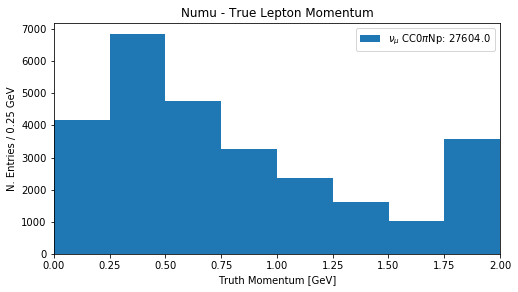

In [12]:
#################
####NUMU#########
#################

category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


########################################
pup = list(numu_mc_vars_tot_run1.values())

i = 0
for c in numu_mc_vars_tot_run1.keys():
    numu_mc_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_run1.values())

i = 0
for c in numu_mc_weights_tot_run1.keys():
    numu_mc_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
############################################# 
pup = list(numu_mc_vars_tot_run3.values())

i = 0
for c in numu_mc_vars_tot_run3.keys():
    numu_mc_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_weights_tot_run3.values())

i = 0
for c in numu_mc_weights_tot_run3.keys():
    numu_mc_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [numu_mc_vars_tot_run1, numu_mc_vars_tot_run3]
weightss = [numu_mc_weights_tot_run1, numu_mc_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 2])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'target_P',8,(0.0, 2.0),"True Momentum [GeV]"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



#current_total_hist = (nue_stacked[0][-1])


#numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.125, 2.125, 0.25)
current_bin_size = 0.25


n_numu_tot = (numu_stacked[0])
print(n_numu_tot)
n_numu_tot = n_numu_tot


#current_total_hist_comb = (nue_stacked_comb[0][-1])
#current_total_hist = (nue_stacked[0])


#nue_allsel_ax1.set_ylim([0, 50])

plt.title("Numu - True Lepton Momentum")
plt.xlabel("Truth Momentum [GeV]")
plt.ylabel("N. Entries / 0.25 GeV")
plt.legend()

In [13]:
numu_wanted_list = n_numu_tot

In [14]:
#Data_signal - UNFOLDING INPUT
prior_true_signal = numu_wanted_list

print(prior_true_signal)

[4155.97704634 6845.533904   4769.21360585 3275.9537876  2364.85511236
 1602.59480856 1023.66597984 3566.23108499]


In [15]:
if isCombined == True and noTune == False and MECTune == False:
    np.savetxt("numu_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True and noTune == True and MECTune == False:
    np.savetxt("numu_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_noTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True and noTune == False and MECTune == True:
    np.savetxt("numu_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_MECTune_recoCut_comb_"+ending+".csv", 
               prior_true_signal,
               delimiter =", ", 
               fmt ='% s')    

## Ratio Plot


bin_ratios:
[0.031123031243886625, 0.04933576283623212, 0.05590776166056238, 0.05643194343232809, 0.04913715648420694, 0.04723850443359166, 0.05062504204043498, 0.03780306945501175]


Making ratio plot.
count,  [0.1, 0.35, 0.6, 0.95, 1.1, 1.35, 1.6, 1.95]
bins,  [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
Weights,  [0.031123031243886625, 0.04933576283623212, 0.05590776166056238, 0.05643194343232809, 0.04913715648420694, 0.04723850443359166, 0.05062504204043498, 0.03780306945501175]



Text(0.5, 1.0, 'Ratio')

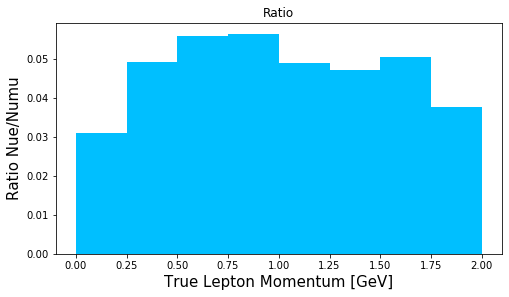

In [16]:
ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])

rbin_ratios = []

#This comes out of the above plots, be it R1, R3, or Combined
nue_ratio_nums = nue_wanted_list
numu_ratio_nums = numu_wanted_list

for i in range(len(numu_ratio_nums)):
    if nue_ratio_nums[i] > 0 and numu_ratio_nums[i] > 0:
        rratio = nue_ratio_nums[i]/numu_ratio_nums[i]
        rbin_ratios.append(rratio)
    else:
        rbin_ratios.append(0)

print("")
print("bin_ratios:")
print(rbin_ratios)
print("")

bins = np.arange(0, 2.25, 0.25)
count = [0.1, 0.35, 0.6, 0.95, 1.1, 1.35, 1.6, 1.95]
#OLD
#bins = np.arange(0, 5.5, 0.5)
#count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]
weights = []
for i in range(len(count)):
    weight = count[i]*rbin_ratios[i]
    weights.append(weight)

print("")
print("Making ratio plot.")
print("count, ", count)
print("bins, ", bins)
print("Weights, ", rbin_ratios)
print("")

sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=rbin_ratios)
ratio_ax1.set_ylabel('Ratio Nue/Numu', fontsize=15)
ratio_ax1.set_xlabel('True Lepton Momentum [GeV]', fontsize=15)
ratio_ax1.set_title("Ratio")

## Errors

### Get ratio stat errs

In [17]:
if isCombined == False:
    nue_nue_stat_errs = np.array(nue_nue_stat_errs)

    numu_mc_stat_errs = np.array(numu_mc_stat_errs)
elif isCombined == True:
    nue_nue_stat_errs_run1 = np.array(nue_nue_stat_errs_run1)
    numu_mc_stat_errs_run1 = np.array(numu_mc_stat_errs_run1)
    nue_nue_stat_errs_run3 = np.array(nue_nue_stat_errs_run3)
    numu_mc_stat_errs_run3 = np.array(numu_mc_stat_errs_run3)
    

### Expected Error Calculations

In [18]:
if isCombined == False:
    nue_exp_err    = np.sqrt(nue_nue_stat_errs)
    totalstat_nue = nue_nue_stat_errs
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")

    numu_exp_err    = np.sqrt(numu_mc_stat_errs)
    totalstat_numu = numu_mc_stat_errs
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
elif isCombined == True:
    nue_exp_err    = np.sqrt(nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3)
    totalstat_nue = nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")
    numu_exp_err    = np.sqrt(numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3)
    totalstat_numu = numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)

totalstat_nue  [5.88461635 8.65675203 8.18812109 6.2661036  3.60413273 2.24168684
 1.50010852 3.35831333]
nue_exp_err  [2.42582282 2.94223589 2.86148931 2.50321865 1.89845535 1.49722638
 1.22478918 1.83257014]

totalstat_numu  [2944.4232587  2286.41547771 2048.80967128 1350.64415836  909.09989267
  566.81324093  317.80772346 1012.12555015]
numu_exp_err  [54.26254011 47.81647705 45.2637788  36.75111098 30.15128343 23.8078399
 17.82716252 31.8139207 ]


In [19]:
###########################################################
#Making cov matricies - the real errors
###########################################################

nue_cov           = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_stat   = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_detsys = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_data_stat = np.zeros([len(nue_exp_err), len(nue_exp_err)])

numu_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

ratio_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

print(ratio_cov)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
if isCombined == False:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_stat_errs)
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_mc_stat_errs)
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))
elif isCombined == True:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_stat_errs_run1 + nue_nue_stat_errs_run3 )
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_mc_stat_errs_run1 + numu_mc_stat_errs_run3)
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))


#Now find the ratio error by combining the variances
squared_ratio_numbers = [number ** 2 for number in rbin_ratios]
dnue = np.diag(nue_cov_mc_stat)/(n_nue_tot**2)
dnumu = np.diag(numu_cov_mc_stat)/(n_numu_tot**2)
rratio_stat_errs = squared_ratio_numbers*((dnue) + (dnumu))


ratio_cov_mc_stat[np.diag_indices_from(ratio_cov_mc_stat)]     = rratio_stat_errs
print("ratio_cov_mc_stat = ", np.nan_to_num(np.diag(ratio_cov_mc_stat)))

nue_cov_mc_stat =  [5.88461635 8.65675203 8.18812109 6.2661036  3.60413273 2.24168684
 1.50010852 3.35831333]
numu_cov_mc_stat =  [2944.4232587  2286.41547771 2048.80967128 1350.64415836  909.09989267
  566.81324093  317.80772346 1012.12555015]
ratio_cov_mc_stat =  [5.05826662e-07 3.03489593e-07 6.41538115e-07 9.84666560e-07
 1.03693822e-06 1.36530130e-06 2.20883090e-06 3.77788340e-07]


In [21]:
#0.6% fractional value being added for nue
#3.2% fractional value being added for numu
#2.4% fractional value being added for ratio

#############################

#i.e. add 12.2%^2 * n total value ^2 (converting fractional to add to non fractional)

#frac_detsys_value_toreg = 0.01*(n_nue_tot*n_nue_tot)
#print(frac_detsys_value_toreg)
#nue_detsys_exp_err = np.full([len(numu_exp_err), len(numu_exp_err)], frac_detsys_value_toreg)

###########################

nue_detsys_errs = (0.006*0.006)*(n_nue_tot*n_nue_tot)
nue_cov_mc_detsys[np.diag_indices_from(nue_cov_mc_detsys)]   = (nue_detsys_errs)
print("nue_cov_mc_detsys = ", np.diag(nue_cov_mc_detsys))


nue_detsys_exp_err = np.sqrt(np.diag(nue_cov_mc_detsys))
nue_detsys_frac_err = nue_detsys_exp_err/(n_nue_tot)
print("totalstat_nue_detsys ", nue_detsys_errs )
print("nue_detsys_exp_err ", nue_detsys_exp_err)
print("nue_detsys_frac_err ", nue_detsys_frac_err)
print("")

#####################################################

numu_detsys_errs = (0.032*0.032)*(n_numu_tot*n_numu_tot)
numu_cov_mc_detsys[np.diag_indices_from(numu_cov_mc_detsys)]   = (numu_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_detsys = ", np.diag(numu_cov_mc_detsys))

numu_detsys_exp_err = np.sqrt(np.diag(numu_cov_mc_detsys))
numu_detsys_frac_err = numu_detsys_exp_err/n_numu_tot
print("totalstat_numu_detsys ", numu_detsys_errs )
print("numu_detsys_exp_err ", numu_detsys_exp_err)
print("numu_detsys_frac_err ", numu_detsys_frac_err)
print("")

#######################################################

ratio_detsys_errs = (0.024*0.024)*(np.array(rbin_ratios)*np.array(rbin_ratios))
ratio_cov_mc_detsys[np.diag_indices_from(ratio_cov_mc_detsys)]   = (ratio_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("ratio_cov_mc_detsys = ", np.diag(ratio_cov_mc_detsys))

ratio_detsys_exp_err = np.sqrt(np.diag(ratio_cov_mc_detsys))
ratio_detsys_frac_err = ratio_detsys_exp_err/rbin_ratios
print("totalstat_ratio_detsys ", ratio_detsys_errs )
print("ratio_detsys_exp_err ", ratio_detsys_exp_err)
print("ratio_detsys_frac_err ", ratio_detsys_frac_err)
print("")

#######################################################

nue_cov_mc_detsys =  [0.60229958 4.10620708 2.55941234 1.23034823 0.48610671 0.20632043
 0.09668294 0.654298  ]
totalstat_nue_detsys  [0.60229958 4.10620708 2.55941234 1.23034823 0.48610671 0.20632043
 0.09668294 0.654298  ]
nue_detsys_exp_err  [0.77607962 2.02637782 1.59981635 1.10921063 0.69721353 0.45422509
 0.3109388  0.80888689]
nue_detsys_frac_err  [0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006]

numu_cov_mc_detsys =  [17686.67669477 47986.00645722 23291.28798022 10989.43817574
  5726.76065532  2629.94956332  1073.04144721 13023.23625118]
totalstat_numu_detsys  [17686.67669477 47986.00645722 23291.28798022 10989.43817574
  5726.76065532  2629.94956332  1073.04144721 13023.23625118]
numu_detsys_exp_err  [132.99126548 219.05708493 152.61483539 104.8305212   75.6753636
  51.28303387  32.75731135 114.11939472]
numu_detsys_frac_err  [0.032 0.032 0.032 0.032 0.032 0.032 0.032 0.032]

ratio_cov_mc_detsys =  [5.57938411e-07 1.40199408e-06 1.80039042e-06 1.83430900e-06
 1.39072904e-06 1

### Now need the systematic errors

In [22]:
if isCombined == False:
    nue_cov = (cov_nue_nue_ppfx + cov_nue_nue_genie + cov_nue_nue_reint)
    nue_cov += (cov_nue_nue_geo)

    numu_cov = (cov_numu_mc_ppfx + cov_numu_mc_genie + cov_numu_mc_reint)
    numu_cov += (cov_numu_mc_geo)
elif isCombined == True:
    nue_cov = (cov_nue_nue_ppfx_run1 + cov_nue_nue_genie_run1 + cov_nue_nue_reint_run1 + cov_nue_nue_ppfx_run3 + cov_nue_nue_genie_run3 + cov_nue_nue_reint_run3)
    nue_cov += (cov_nue_nue_geo_run1 + cov_nue_nue_geo_run3)

    numu_cov = (cov_numu_mc_ppfx_run1 + cov_numu_mc_genie_run1 + cov_numu_mc_reint_run1 + cov_numu_mc_ppfx_run3 + cov_numu_mc_genie_run3 + cov_numu_mc_reint_run3 )
    numu_cov += (cov_numu_mc_geo_run1 + cov_numu_mc_geo_run3)

In [23]:
nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys)))

numu_exp_err = np.sqrt( np.diag((numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys)))

print("")
print("nue_exp_err ", nue_exp_err)
print("")
nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot)
print("nue_frac_err ",nue_frac_err)
print("")
print("numu_exp_err ", numu_exp_err)
numu_frac_err = np.nan_to_num(numu_exp_err / n_numu_tot)
print("")
print("numu_frac_err ", numu_frac_err)


nue_exp_err  [27.32874191 50.92541182 40.91790947 29.52885814 18.60847792 11.7204988
  8.26779662 24.57233928]

nue_frac_err  [0.21128303 0.15078751 0.15345978 0.15972904 0.1601387  0.1548197
 0.15953873 0.1822678 ]

numu_exp_err  [ 812.74433315 1039.03807124  796.17096644  538.69778289  378.74349164
  255.5337774   156.42091364  667.81825696]

numu_frac_err  [0.19556035 0.15178335 0.16693967 0.16443998 0.16015505 0.15945002
 0.15280464 0.18726163]


In [24]:
total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys
total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys

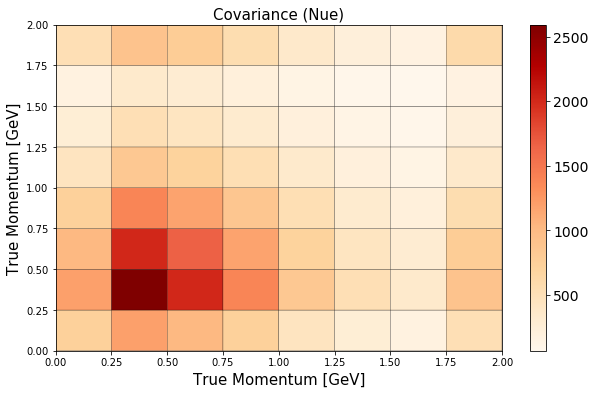

In [25]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_nue_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Momentum [GeV]", fontsize=15)
plt.ylabel("True Momentum [GeV]", fontsize=15)


plt.title('Covariance (Nue)', fontsize=15)

plt.savefig("Nue_Full_Truth_Cov_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

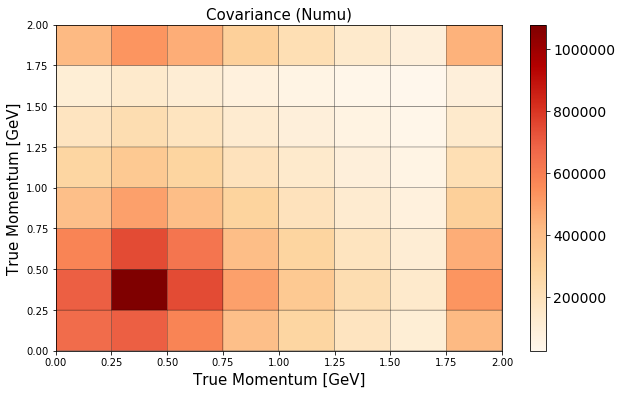

In [26]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_numu_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Momentum [GeV]", fontsize=15)
plt.ylabel("True Momentum [GeV]", fontsize=15)


plt.title('Covariance (Numu)', fontsize=15)

plt.savefig("Numu_Full_Truth_Cov_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

In [27]:
nue_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_nue_cov[i][j]
        
        if n_nue_tot[i]*n_nue_tot[j] != 0:
            nue_frac_cov[i][j] += c/(n_nue_tot[i]*n_nue_tot[j])
            
print(nue_frac_cov)
print("")
print(np.sqrt(np.diag(nue_frac_cov)))
print("")

############################################

numu_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_numu_cov[i][j]
        
        if n_numu_tot[i]*n_numu_tot[j] != 0:
            numu_frac_cov[i][j] += c/(n_numu_tot[i]*n_numu_tot[j])

print("")
print(numu_frac_cov)
print("")
print(np.sqrt(np.diag(numu_frac_cov)))

[[0.04464051748953282, 0.027403793095850976, 0.029884485282038874, 0.031110800051134424, 0.03003347806056754, 0.028121379312765066, 0.027773665878629897, 0.030078375927844753], [0.027403793095850976, 0.022736873863936, 0.0224217386923172, 0.02234737227697741, 0.021732082756256085, 0.020591446167527703, 0.019904380457605394, 0.020070363837615807], [0.029884485282038874, 0.0224217386923172, 0.023549902621098115, 0.023873638977975748, 0.023186733142642, 0.021891777246958996, 0.021398007138711393, 0.02199122245599994], [0.031110800051134424, 0.02234737227697741, 0.023873638977975748, 0.02551336601518356, 0.02491708897433594, 0.023572729279794712, 0.02326269872003781, 0.022837734391310212], [0.03003347806056754, 0.021732082756256085, 0.023186733142642, 0.02491708897433594, 0.025644402548206567, 0.02409581215812405, 0.0241787462844822, 0.022878798363581893], [0.028121379312765066, 0.020591446167527703, 0.021891777246958996, 0.023572729279794712, 0.02409581215812405, 0.023969139736454245, 0.0

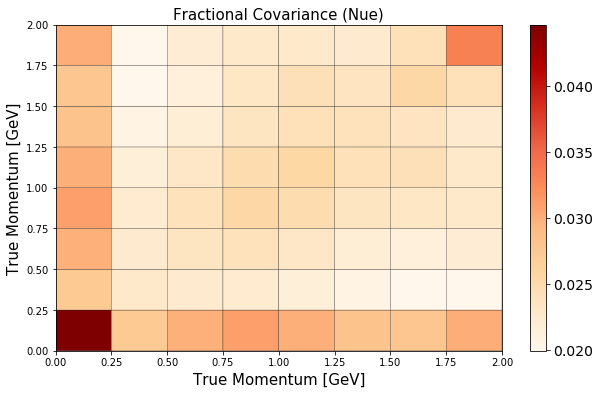

In [28]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Momentum [GeV]", fontsize=15)
plt.ylabel("True Momentum [GeV]", fontsize=15)


plt.title('Fractional Covariance (Nue)', fontsize=15)

plt.savefig("Nue_Full_Truth_FracCov_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

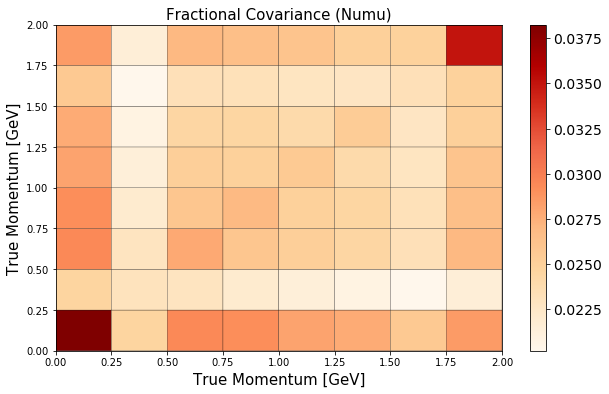

In [29]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Momentum [GeV]", fontsize=15)
plt.ylabel("True Momentum [GeV]", fontsize=15)


plt.title('Fractional Covariance (Numu)', fontsize=15)

plt.savefig("Numu_Full_Truth_FracCov_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

In [30]:
##########################
nue_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 

for i in range(len(total_nue_cov)): 
    for j in range(len(total_nue_cov[i])): 

        if np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]) != 0: 
            nue_cor[i][j] = total_nue_cov[i][j] / (np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]))
            
##########################
numu_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 

for i in range(len(total_numu_cov)): 
    for j in range(len(total_numu_cov[i])): 

        if np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]) != 0: 
            numu_cor[i][j] = total_numu_cov[i][j] / (np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]))  

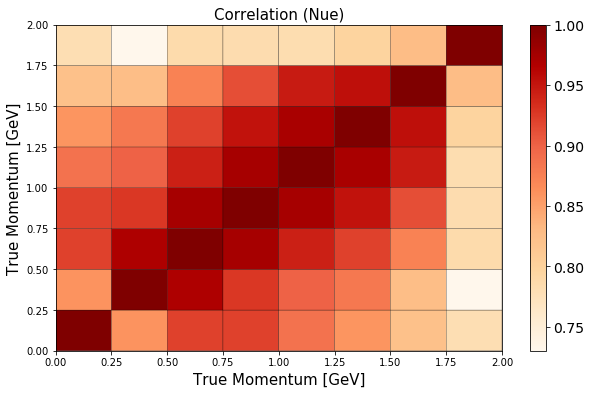

In [31]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_cor, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Momentum [GeV]", fontsize=15)
plt.ylabel("True Momentum [GeV]", fontsize=15)


plt.title('Correlation (Nue)', fontsize=15)

plt.savefig("Nue_Full_Truth_Cor_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

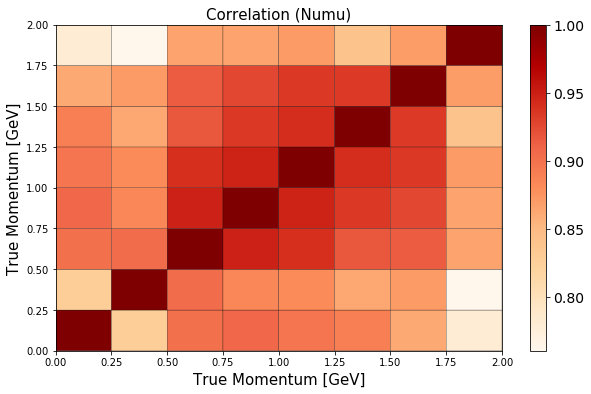

In [32]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_cor, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("True Momentum [GeV]", fontsize=15)
plt.ylabel("True Momentum [GeV]", fontsize=15)


plt.title('Correlation (Numu)', fontsize=15)

plt.savefig("Numu_Full_Truth_Cor_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

### Ratio Sys Errors

In [38]:
#####CORRECT way of doing ratio errors##########
##################
#### ppfx ##########
##################


####First get the central value to compare against. We have already got this above. 
#This will come from plots, so irrelevant if from R1, R3, or Combined
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list

rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 8
x_range = (0.0, 2.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_ppfx
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_ppfx_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_ppfx_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()

    ##Numu
    s_m = numu_mc_df_ppfx
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_ppfx_vars.squeeze()
    #variable_numu = variable_numu["nu_e"] 
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_ppfx_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    #spline_fix_var_numu = spline_fix_var_numu["weightSplineTimesTuneTimesPPFX"]


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)
            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_ppfx_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_ppfx_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_ppfx_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_ppfx_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_ppfx_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_ppfx_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_ppfx_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_ppfx_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_ppfx_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_ppfx_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_ppfx_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_ppfx_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys             

        
##Cov matrix

cov_ratio_ppfx = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_ppfx.fill(0)

n_cv_tot = rbin_cv_ratios

a = -1
for n in n_tot:
    a = a + 1
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_ppfx[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

                
cov_ratio_ppfx /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_ppfx)
print("--------------------------------------------------")
print("")



cov of ratio sys error =  [[3.52572202e-06 5.21947737e-06 4.84124184e-06 3.87933081e-06
  2.40923975e-06 1.52584988e-06 8.26263685e-07 6.10198216e-07]
 [5.21947737e-06 8.25270498e-06 7.78106992e-06 6.43925376e-06
  3.96701757e-06 2.46235155e-06 1.28500397e-06 1.11297907e-06]
 [4.84124184e-06 7.78106992e-06 7.95845121e-06 6.63003023e-06
  4.06399226e-06 2.54975126e-06 1.34845487e-06 1.38632826e-06]
 [3.87933081e-06 6.43925376e-06 6.63003023e-06 6.26014953e-06
  3.80301927e-06 2.55319607e-06 1.53952054e-06 1.71798450e-06]
 [2.40923975e-06 3.96701757e-06 4.06399226e-06 3.80301927e-06
  3.01404437e-06 2.07546596e-06 1.89451417e-06 1.30108446e-06]
 [1.52584988e-06 2.46235155e-06 2.54975126e-06 2.55319607e-06
  2.07546596e-06 2.04858279e-06 1.96417166e-06 1.15003939e-06]
 [8.26263685e-07 1.28500397e-06 1.34845487e-06 1.53952054e-06
  1.89451417e-06 1.96417166e-06 2.95963846e-06 1.17172225e-06]
 [6.10198216e-07 1.11297907e-06 1.38632826e-06 1.71798450e-06
  1.30108446e-06 1.15003939e-06 1.17

In [39]:
#####CORRECT way of doing ratio errors##########
##################
#### genie ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 8
x_range = (0.0, 2.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_genie
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_genie_vars.squeeze()
    #variable_nue = variable_nue["nu_e"] 
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_genie_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()
    #print(spline_fix_var_nue)
    #spline_fix_var_nue = spline_fix_var_nue["weightSpline"]

    ##Numu
    s_m = numu_mc_df_genie
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_genie_vars.squeeze()
    #variable_numu = variable_numu["nu_e"] 
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_genie_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    #spline_fix_var_numu = spline_fix_var_numu["weightSpline"]


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_genie_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_genie_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_genie_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_genie_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_genie_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_genie_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_genie_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_genie_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_genie_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_genie_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_genie_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_genie_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_genie = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_genie.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_genie[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_genie /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_genie)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 3.27636133e-06  9.05280257e-07 -7.38904804e-07 -7.29725061e-07
  -3.21470534e-07 -9.62063738e-07  5.38683207e-07 -7.89833407e-07]
 [ 9.05280257e-07  3.25575280e-07 -3.51017632e-07 -2.42560653e-07
  -1.77739756e-07 -4.39645587e-07  1.33908498e-07 -2.49042475e-07]
 [-7.38904804e-07 -3.51017632e-07  1.23122926e-06  6.13545552e-07
   4.63168505e-07  1.17862597e-06  2.08664515e-08  4.08768227e-07]
 [-7.29725061e-07 -2.42560653e-07  6.13545552e-07  4.59990967e-07
   1.78885301e-07  5.41861232e-07 -4.07482619e-08  3.04419862e-07]
 [-3.21470534e-07 -1.77739756e-07  4.63168505e-07  1.78885301e-07
   2.95272277e-07  5.51733014e-07  2.16715515e-08  1.42565743e-07]
 [-9.62063738e-07 -4.39645587e-07  1.17862597e-06  5.41861232e-07
   5.51733014e-07  1.33672531e-06 -3.83110053e-08  4.06943547e-07]
 [ 5.38683207e-07  1.33908498e-07  2.08664515e-08 -4.07482619e-08
   2.16715515e-08 -3.83110053e-08  2.78479358e-07 -6.20321605e-08]
 [-7.89833407e-07 -2.49042475e-07  4.08768

In [40]:
#####CORRECT way of doing ratio errors##########
##################
#### reint ##########
##################


####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 500
n_bins = 8
x_range = (0.0, 2.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    ##Nue
    s_n = nue_nue_df_reint
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_reint_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_reint_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()

    ##Numu
    s_m = numu_mc_df_reint
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_reint_vars.squeeze()
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_reint_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()


    ##Ratio
    if (not df_n.empty) and (not df_m.empty):
        for i in range(Nuniverse):
            weight_n = df_n[i].values / 1000.
            weight_n[np.isnan(weight_n)] = 1
            weight_n[weight_n > 100] = 1
            weight_n[weight_n < 0] = 1
            weight_n[weight_n == np.inf] = 1
            weight_m = df_m[i].values / 1000.
            weight_m[np.isnan(weight_m)] = 1
            weight_m[weight_m > 100] = 1
            weight_m[weight_m < 0] = 1
            weight_m[weight_m == np.inf] = 1
            n_n, bins = np.histogram(
                variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
            n_m, bins = np.histogram(
                variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

            rbin_ratios_sys = []

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
            
elif isCombined == True:
    ##Nue
    s_n_run1 = nue_nue_df_reint_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_reint_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_reint_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_reint_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_reint_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_reint_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_reint_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_reint_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_reint_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_reint_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_reint_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_reint_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    


    ##Ratio
    if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
        for i in range(Nuniverse):
            weight_n_run1 = df_n_run1[i].values / 1000.   ###
            weight_n_run1[np.isnan(weight_n_run1)] = 1
            weight_n_run1[weight_n_run1 > 100] = 1
            weight_n_run1[weight_n_run1 < 0] = 1
            weight_n_run1[weight_n_run1 == np.inf] = 1
            weight_n_run3 = df_n_run3[i].values / 1000.   ###
            weight_n_run3[np.isnan(weight_n_run3)] = 1
            weight_n_run3[weight_n_run3 > 100] = 1
            weight_n_run3[weight_n_run3 < 0] = 1
            weight_n_run3[weight_n_run3 == np.inf] = 1
            weight_m_run1 = df_m_run1[i].values / 1000.   ###
            weight_m_run1[np.isnan(weight_m_run1)] = 1
            weight_m_run1[weight_m_run1 > 100] = 1
            weight_m_run1[weight_m_run1 < 0] = 1
            weight_m_run1[weight_m_run1 == np.inf] = 1
            weight_m_run3 = df_m_run3[i].values / 1000.   ###
            weight_m_run3[np.isnan(weight_m_run3)] = 1
            weight_m_run3[weight_m_run3 > 100] = 1
            weight_m_run3[weight_m_run3 < 0] = 1
            weight_m_run3[weight_m_run3 == np.inf] = 1
            n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
            n_n_run3, bins = np.histogram(
                variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
            n_m_run1, bins = np.histogram(
                variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
            n_m_run3, bins = np.histogram(
                variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)
            rbin_ratios_sys = []
            
            n_n = n_n_run1 + n_n_run3
            n_m = n_m_run1 + n_m_run3

            for g in range(len(n_n)):
                if n_n[g] > 0 and n_m[g] > 0:
                    rratio = n_n[g]/n_m[g]
                    rbin_ratios_sys.append(rratio)
                else:
                    rbin_ratios_sys.append(0)

            n_tot[i] += rbin_ratios_sys 
        
##Cov matrix

cov_ratio_reint = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
cov_ratio_reint.fill(0)

n_cv_tot = rbin_cv_ratios

for n in n_tot:
    for i in range(len(rbin_cv_ratios)):
        for j in range(len(rbin_cv_ratios)):
            cov_ratio_reint[i][j] += (n[i] - n_cv_tot[i]) * (n[j] - n_cv_tot[j])

cov_ratio_reint /= Nuniverse
print("")
print("cov of ratio sys error = ", cov_ratio_reint)
print("--------------------------------------------------")
print("")


cov of ratio sys error =  [[ 2.80920658e-08 -2.63996643e-09 -3.27620411e-08  1.09269655e-08
  -1.62417498e-08 -1.87654413e-08 -6.58069456e-08 -2.26292690e-08]
 [-2.63996643e-09  8.67258613e-10  2.71030664e-09 -3.23739572e-09
  -3.41007884e-10  3.79571513e-09 -4.23226425e-11  9.91127788e-10]
 [-3.27620411e-08  2.71030664e-09  4.00122544e-08 -1.07795711e-08
   2.25934992e-08  2.09909892e-08  8.30847937e-08  2.81620083e-08]
 [ 1.09269655e-08 -3.23739572e-09 -1.07795711e-08  1.24997057e-08
   1.13306924e-09 -1.41622536e-08 -2.97095752e-09 -4.44990157e-09]
 [-1.62417498e-08 -3.41007884e-10  2.25934992e-08  1.13306924e-09
   2.05452236e-08  3.58195925e-09  6.54050345e-08  1.91206239e-08]
 [-1.87654413e-08  3.79571513e-09  2.09909892e-08 -1.41622536e-08
   3.58195925e-09  2.13445187e-08  1.87682560e-08  1.05021472e-08]
 [-6.58069456e-08 -4.23226425e-11  8.30847937e-08 -2.97095752e-09
   6.54050345e-08  1.87682560e-08  2.35291336e-07  6.91024229e-08]
 [-2.26292690e-08  9.91127788e-10  2.81620

In [41]:
#####CORRECT way of doing ratio errors##########
##################
#### geo ##########
##################

####First get the central value to compare against. We have already got this above. 
nue_central_values = nue_wanted_list
numu_central_values = numu_wanted_list


rbin_cv_ratios = []
for i in range(len(numu_central_values)):
    if nue_central_values[i] > 0 and numu_central_values[i] > 0:
        rratio = nue_central_values[i]/numu_central_values[i]
        rbin_cv_ratios.append(rratio)
    else:
        rbin_cv_ratios.append(0)


#######Now, get each universe###########################
Nuniverse = 10
n_bins = 8
x_range = (0.0, 2.0)

n_tot = np.empty([Nuniverse, n_bins])
n_tot.fill(0)

if isCombined == False:
    cov_ratio_geo = False
    
    ##Nue
    s_n = nue_nue_df_geo
    df_n = pd.DataFrame(s_n.values.tolist())

    variable_nue = nue_nue_df_geo_vars.squeeze()
    spline_fix_var_nue = pd.DataFrame(nue_nue_df_geo_splines)
    spline_fix_var_nue = spline_fix_var_nue.squeeze()


    ##Numu
    s_m = numu_mc_df_geo
    df_m = pd.DataFrame(s_m.values.tolist())

    variable_numu = numu_mc_df_geo_vars.squeeze()
    spline_fix_var_numu = pd.DataFrame(numu_mc_df_geo_splines)
    spline_fix_var_numu = spline_fix_var_numu.squeeze()
    
    ##Ratio
    print("Number of variations Universes",10)
    for variationNumber in [x*2 for x in range(10)]:
        n_tot = np.empty([2, n_bins])
        n_tot.fill(0.)
        if (not df_n.empty) and (not df_m.empty):
            for i in range(2):
                weight_n = df_n[i+variationNumber].values
                weight_n[np.isnan(weight_n)] = 1
                weight_n[weight_n > 100] = 1
                weight_n[weight_n < 0] = 1
                weight_n[weight_n == np.inf] = 1
                weight_m = df_m[i+variationNumber].values
                weight_m[np.isnan(weight_m)] = 1
                weight_m[weight_m > 100] = 1
                weight_m[weight_m < 0] = 1
                weight_m[weight_m == np.inf] = 1
                n_n, bins = np.histogram(
                    variable_nue, weights=weight_n*spline_fix_var_nue, range=x_range, bins=n_bins)
                n_m, bins = np.histogram(
                    variable_numu, weights=weight_m*spline_fix_var_numu, range=x_range, bins=n_bins)

                rbin_ratios_sys = []

                for g in range(len(n_n)):
                    if n_n[g] > 0 and n_m[g] > 0:
                        rratio = n_n[g]/n_m[g]
                        rbin_ratios_sys.append(rratio)
                    else:
                        rbin_ratios_sys.append(0)

                n_tot[i] += rbin_ratios_sys

                
    ##Cov matrix

    tempCov = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
    tempCov.fill(0)

    x = variationNumber/2
    for n in n_tot:
        for i in range(len(rbin_cv_ratios)):
            for j in range(len(rbin_cv_ratios)):
                a = int(i)
                b = int(j)
                tempCov[a][b] += (n[a] - rbin_cv_ratios[a]) * (n[b] - rbin_cv_ratios[b])


    tempCov /= 2
    if variationNumber == 0 or (not cov_ratio_geo):
        cov_ratio_geo = tempCov
    else:
        cov_ratio_geo += tempCov         

elif isCombined == True:
    
    cov_ratio_geo = False
    
    ##Nue
    s_n_run1 = nue_nue_df_geo_run1
    df_n_run1 = pd.DataFrame(s_n_run1.values.tolist())

    variable_nue_run1 = nue_nue_df_geo_vars_run1.squeeze()
    spline_fix_var_nue_run1 = pd.DataFrame(nue_nue_df_geo_splines_run1)
    spline_fix_var_nue_run1 = spline_fix_var_nue_run1.squeeze()
    
    s_n_run3 = nue_nue_df_geo_run3
    df_n_run3 = pd.DataFrame(s_n_run3.values.tolist())

    variable_nue_run3 = nue_nue_df_geo_vars_run3.squeeze()
    spline_fix_var_nue_run3 = pd.DataFrame(nue_nue_df_geo_splines_run3)
    spline_fix_var_nue_run3 = spline_fix_var_nue_run3.squeeze()

    ##Numu
    s_m_run1 = numu_mc_df_geo_run1
    df_m_run1= pd.DataFrame(s_m_run1.values.tolist())

    variable_numu_run1 = numu_mc_df_geo_vars_run1.squeeze()
    spline_fix_var_numu_run1 = pd.DataFrame(numu_mc_df_geo_splines_run1)
    spline_fix_var_numu_run1 = spline_fix_var_numu_run1.squeeze()
    
    s_m_run3 = numu_mc_df_geo_run3
    df_m_run3= pd.DataFrame(s_m_run3.values.tolist())

    variable_numu_run3 = numu_mc_df_geo_vars_run3.squeeze()
    spline_fix_var_numu_run3 = pd.DataFrame(numu_mc_df_geo_splines_run3)
    spline_fix_var_numu_run3 = spline_fix_var_numu_run3.squeeze()
    
    ##Ratio
    print("Number of variations Universes",10)
    for variationNumber in [x*2 for x in range(10)]:
        n_tot = np.empty([2, n_bins])
        n_tot.fill(0.)
        if ((not df_n_run1.empty) or (not df_n_run3.empty)) and ((not df_m_run1.empty) or (not df_m_run3.empty)):
            for i in range(2):
                weight_n_run1 = df_n_run1[i+variationNumber].values    ###
                weight_n_run1[np.isnan(weight_n_run1)] = 1
                weight_n_run1[weight_n_run1 > 100] = 1
                weight_n_run1[weight_n_run1 < 0] = 1
                weight_n_run1[weight_n_run1 == np.inf] = 1
                weight_n_run3 = df_n_run3[i+variationNumber].values    ###
                weight_n_run3[np.isnan(weight_n_run3)] = 1
                weight_n_run3[weight_n_run3 > 100] = 1
                weight_n_run3[weight_n_run3 < 0] = 1
                weight_n_run3[weight_n_run3 == np.inf] = 1
                weight_m_run1 = df_m_run1[i+variationNumber].values    ###
                weight_m_run1[np.isnan(weight_m_run1)] = 1
                weight_m_run1[weight_m_run1 > 100] = 1
                weight_m_run1[weight_m_run1 < 0] = 1
                weight_m_run1[weight_m_run1 == np.inf] = 1
                weight_m_run3 = df_m_run3[i+variationNumber].values    ###
                weight_m_run3[np.isnan(weight_m_run3)] = 1
                weight_m_run3[weight_m_run3 > 100] = 1
                weight_m_run3[weight_m_run3 < 0] = 1
                weight_m_run3[weight_m_run3 == np.inf] = 1
                n_n_run1, bins = np.histogram(
                variable_nue_run1, weights=weight_n_run1*spline_fix_var_nue_run1, range=x_range, bins=n_bins)
                n_n_run3, bins = np.histogram(
                    variable_nue_run3, weights=weight_n_run3*spline_fix_var_nue_run3, range=x_range, bins=n_bins)
                n_m_run1, bins = np.histogram(
                    variable_numu_run1, weights=weight_m_run1*spline_fix_var_numu_run1, range=x_range, bins=n_bins)
                n_m_run3, bins = np.histogram(
                    variable_numu_run3, weights=weight_m_run3*spline_fix_var_numu_run3, range=x_range, bins=n_bins)

                rbin_ratios_sys = []
                
                n_n = n_n_run1 + n_n_run3
                n_m = n_m_run1 + n_m_run3

                for g in range(len(n_n)):
                    if n_n[g] > 0 and n_m[g] > 0:
                        rratio = n_n[g]/n_m[g]
                        rbin_ratios_sys.append(rratio)
                    else:
                        rbin_ratios_sys.append(0)

                n_tot[i] += rbin_ratios_sys
    

    ##Cov matrix

    tempCov = np.empty([len(rbin_cv_ratios), len(rbin_cv_ratios)])
    tempCov.fill(0)

    x = variationNumber/2
    for n in n_tot:
        for i in range(len(rbin_cv_ratios)):
            for j in range(len(rbin_cv_ratios)):
                a = int(i)
                b = int(j)
                tempCov[a][b] += (n[a] - rbin_cv_ratios[a]) * (n[b] - rbin_cv_ratios[b])


    tempCov /= 2
    if (variationNumber == 0) or (not cov_ratio_geo):
        cov_ratio_geo = tempCov
    else:
        cov_ratio_geo += tempCov 
    
print("")
print("cov of ratio sys error = ", cov_ratio_geo)
print("--------------------------------------------------")
print("")

Number of variations Universes 10

cov of ratio sys error =  [[ 3.95018774e-08  7.43125461e-08  6.98182080e-08 -1.23051752e-07
  -2.06201278e-07 -1.62996252e-07 -2.64222935e-07  1.60433275e-07]
 [ 7.43125461e-08  1.49155887e-07  1.66597667e-07 -2.04382519e-07
  -3.64100069e-07 -2.97598016e-07 -4.83612562e-07  3.68964063e-07]
 [ 6.98182080e-08  1.66597667e-07  2.56230287e-07 -1.15351531e-07
  -2.74724142e-07 -2.54039026e-07 -4.16310032e-07  5.36576356e-07]
 [-1.23051752e-07 -2.04382519e-07 -1.15351531e-07  4.61855473e-07
   7.11331814e-07  5.33930898e-07  8.62058807e-07 -3.05208035e-07]
 [-2.06201278e-07 -3.64100069e-07 -2.74724142e-07  7.11331814e-07
   1.13699305e-06  8.73849045e-07  1.41349936e-06 -6.66548639e-07]
 [-1.62996252e-07 -2.97598016e-07 -2.54039026e-07  5.33930898e-07
   8.73849045e-07  6.81299176e-07  1.10325663e-06 -5.97132763e-07]
 [-2.64222935e-07 -4.83612562e-07 -4.16310032e-07  8.62058807e-07
   1.41349936e-06  1.10325663e-06  1.78670093e-06 -9.76552426e-07]
 [ 1.604

In [42]:
ratio_cov = (cov_ratio_ppfx + cov_ratio_genie + cov_ratio_reint)
ratio_cov += (cov_ratio_geo)

print(ratio_cov)

[[ 6.86967729e-06  6.19643021e-06  4.13939320e-06  3.03748096e-06
   1.86532619e-06  3.82024444e-07  1.03491701e-06 -4.18311850e-08]
 [ 6.19643021e-06  8.72830340e-06  7.59936026e-06  5.98907319e-06
   3.42483674e-06  1.72890366e-06  9.35257587e-07  1.23389179e-06]
 [ 4.13939320e-06  7.59936026e-06  9.48592302e-06  7.11744468e-06
   4.27503012e-06  3.49532920e-06  1.03609608e-06  2.35983485e-06]
 [ 3.03748096e-06  5.98907319e-06  7.11744468e-06  7.19449568e-06
   4.69436945e-06  3.61482594e-06  2.35786013e-06  1.71274643e-06]
 [ 1.86532619e-06  3.42483674e-06  4.27503012e-06  4.69436945e-06
   4.46685492e-06  3.50462997e-06  3.39509012e-06  7.96222191e-07]
 [ 3.82024444e-07  1.72890366e-06  3.49532920e-06  3.61482594e-06
   3.50462997e-06  4.08795180e-06  3.04788554e-06  9.70352319e-07]
 [ 1.03491701e-06  9.35257587e-07  1.03609608e-06  2.35786013e-06
   3.39509012e-06  3.04788554e-06  5.26011008e-06  2.02240087e-07]
 [-4.18311850e-08  1.23389179e-06  2.35983485e-06  1.71274643e-06
   

In [43]:
total_cov = ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys

##########################

ratio_frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_cov[i][j]
        
        if rbin_ratios[i]*rbin_ratios[j] != 0:
            ratio_frac_cov[i][j] = c/(rbin_ratios[i]*rbin_ratios[j])
            
print(ratio_frac_cov)
print("")

##########################
ratio_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

# compute the corr matrix 

for i in range(len(total_cov)): 
    for j in range(len(total_cov[i])): 

        if np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]) != 0: 
            ratio_cor[i][j] = total_cov[i][j] / (np.sqrt(total_cov[i][i])*np.sqrt(total_cov[j][j]))

[[0.008190263865443869, 0.004035504409872644, 0.002378935613870248, 0.0017294446547549468, 0.0012197276774277353, 0.00025984425816718876, 0.000656837954433734, -3.555422485898278e-05], [0.004035504409872644, 0.00428665245616298, 0.0027551362483973127, 0.002151160258347605, 0.0014127587465372707, 0.0007418443717236104, 0.00037445876054185214, 0.0006615888257727583], [0.002378935613870248, 0.0027551362483973127, 0.0038160847860670686, 0.002255937109633501, 0.0015561700515081083, 0.0013234874884556708, 0.00036606864409083274, 0.0011165609661434655], [0.0017294446547549468, 0.002151160258347605, 0.002255937109633501, 0.003144377217593518, 0.0016929426196217448, 0.0013560204658359571, 0.0008253300047070605, 0.0008028621774861938], [0.0012197276774277353, 0.0014127587465372707, 0.0015561700515081083, 0.0016929426196217448, 0.002855512939546624, 0.0015098576745151246, 0.0013648216049390904, 0.0004286444378850925], [0.00025984425816718876, 0.0007418443717236104, 0.0013234874884556708, 0.001356

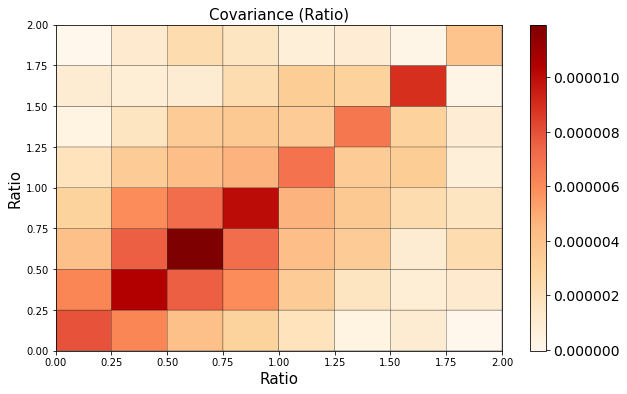

In [44]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Covariance (Ratio)', fontsize=15)

plt.savefig("Ratio_Full_Truth_Cov_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

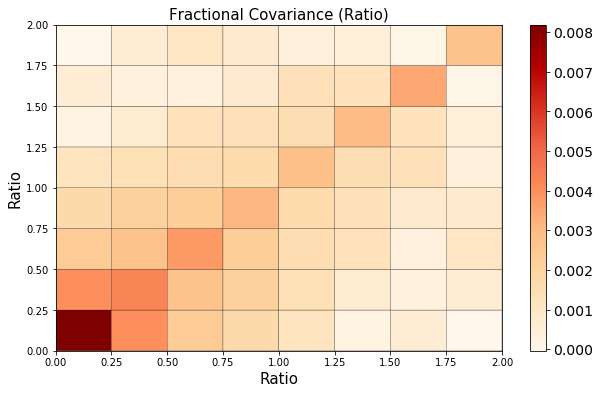

In [45]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, ratio_frac_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Fractional Covariance (Ratio)', fontsize=15)

plt.savefig("Ratio_Full_Truth_FracCov_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

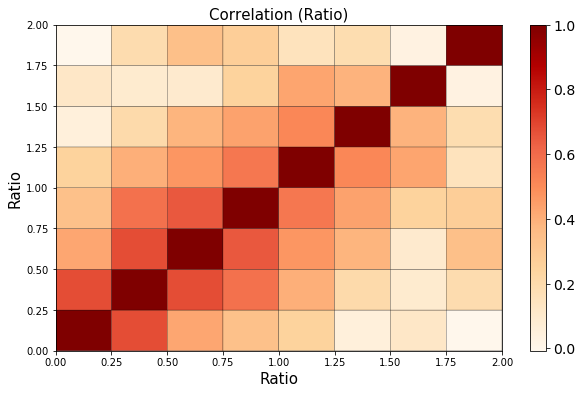

In [46]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, ratio_cor, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)


plt.xlabel("Ratio", fontsize=15)
plt.ylabel("Ratio", fontsize=15)


plt.title('Correlation (Ratio)', fontsize=15)

plt.savefig("Ratio_Full_Truth_Cor_leptonMom_"+ending+".svg", bbox_inches='tight')

plt.show()

In [47]:
ratio_exp_err = np.sqrt( np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys)))

print("ratio_cov ", np.diag(ratio_cov))
print("")
print("ratio_cov_mc_stat ", np.nan_to_num(np.diag(ratio_cov_mc_stat)))
print("")
print("np.diag ", np.nan_to_num(np.diag((ratio_cov + ratio_cov_mc_stat + ratio_cov_mc_detsys))))
print("")
print("ratio_exp_err ", np.nan_to_num(ratio_exp_err))

ratio_cov  [6.86967729e-06 8.72830340e-06 9.48592302e-06 7.19449568e-06
 4.46685492e-06 4.08795180e-06 5.26011008e-06 2.68707979e-06]

ratio_cov_mc_stat  [5.05826662e-07 3.03489593e-07 6.41538115e-07 9.84666560e-07
 1.03693822e-06 1.36530130e-06 2.20883090e-06 3.77788340e-07]

np.diag  [7.93344237e-06 1.04337871e-05 1.19278516e-05 1.00134712e-05
 6.89452219e-06 6.73858346e-06 8.94516843e-06 3.88801363e-06]

ratio_exp_err  [0.00281664 0.00323014 0.00345367 0.00316441 0.00262574 0.00259588
 0.00299085 0.0019718 ]


[0.08421438 0.05988293 0.05508936 0.04753081 0.04301213 0.04280128
 0.04530353 0.04336239]


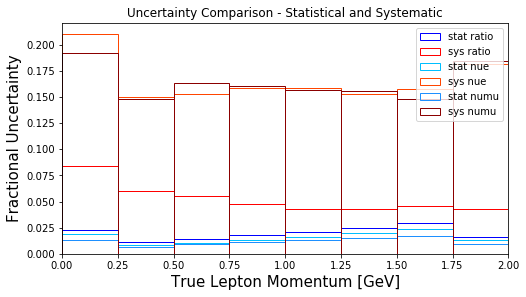

In [48]:
errors_r_fig = plt.figure(figsize=(8, 7))
errors_r_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_r_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 2.25, 0.25)
count = [0.1, 0.35, 0.6, 0.95, 1.1, 1.35, 1.6, 1.95]



nue_stat_weights = np.nan_to_num(np.sqrt(np.diag(nue_cov_mc_stat))/nue_wanted_list)
nue_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(nue_cov)))/nue_wanted_list)
numu_stat_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(numu_cov_mc_stat)))/numu_wanted_list)
numu_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(numu_cov)))/numu_wanted_list)
ratio_stat_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(ratio_cov_mc_stat)))/rbin_ratios)
ratio_sys_weights = np.nan_to_num(np.sqrt(np.nan_to_num(np.diag(ratio_cov)))/rbin_ratios)

print(ratio_sys_weights)

sel_stat = errors_r_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=ratio_stat_weights, label='stat ratio')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_sys_weights, label='sys ratio')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='deepskyblue', facecolor='None', weights=nue_stat_weights, label='stat nue')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='orangered', facecolor='None', weights=nue_sys_weights, label='sys nue')
sel_stat = errors_r_ax1.hist(count, bins, edgecolor='dodgerblue', facecolor='None', weights=numu_stat_weights, label='stat numu')
sel_sys = errors_r_ax1.hist(count, bins, edgecolor='darkred', facecolor='None', weights=numu_sys_weights, label='sys numu')
errors_r_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_r_ax1.set_xlabel('True Lepton Momentum [GeV]', fontsize=15)
errors_r_ax1.set_title("Uncertainty Comparison - Statistical and Systematic")
errors_r_ax1.set_xlim([0, 2])
#errors_r_ax1.set_ylim([0, 100])
leg = errors_r_ax1.legend()
#errors_r_ax1.set_yscale('log')

In [49]:
if isRun3 == False and isCombined == False:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_leptonMom_fraclog_consistent_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_leptonMom_fraclog_consistent_run3_"+ending+".pdf")
elif isCombined == True:
    errors_r_fig.savefig("batch_stat_vs_sys_errors_fig_full_500_catsel_ratio_nopions_leptonMom_fraclog_consistent_comb_"+ending+".svg",bbox_inches='tight')    
       

In [52]:
ratio_bins = np.arange(0, 2.25, 0.25)
ratio_bincenters = np.arange(0.125, 2.125, 0.25)
ratio_bin_edges = np.arange(0, 2.25, 0.25)
ratio_bin_size = [(ratio_bin_edges[i + 1] - ratio_bin_edges[i]) / 2
            for i in range(len(ratio_bin_edges) - 1)]
ratio_n_tot = rbin_ratios

print(ratio_n_tot)
print("")
print("error")
print(np.nan_to_num(ratio_exp_err))
print("")
ratio_frac_err = np.nan_to_num(ratio_exp_err / ratio_n_tot)
print(ratio_frac_err)
lower_err = np.nan_to_num(ratio_n_tot-ratio_exp_err)

#nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(nue_n_tot-nue_exp_err))
#numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:blue',alpha=0.2,bottom=(numu_n_tot-numu_exp_err))
ratio_ax1.bar(ratio_bincenters, ratio_exp_err*2,width=[n*2 for n in ratio_bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))
#ratio_ax1.set_ylim([0, 2.1])
ratio_ax1.set_xlim([0, 2])

[0.031123031243886625, 0.04933576283623212, 0.05590776166056238, 0.05643194343232809, 0.04913715648420694, 0.04723850443359166, 0.05062504204043498, 0.03780306945501175]

error
[0.00281664 0.00323014 0.00345367 0.00316441 0.00262574 0.00259588
 0.00299085 0.0019718 ]

[0.09050008 0.06547253 0.06177447 0.05607475 0.053437   0.05495259
 0.05907842 0.05215991]


(0, 2)

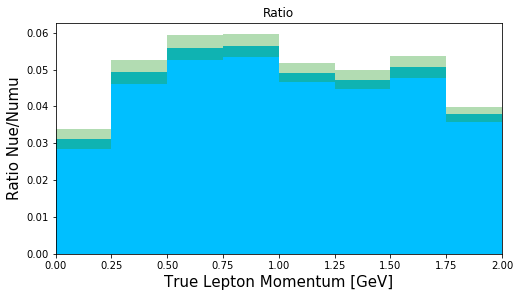

In [53]:
ratio_fig


In [54]:
if isRun3 == False and isCombined == False:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_leptonMom_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_leptonMom_recoCut_run3_"+ending+".pdf") 
elif isCombined == True:
    ratio_fig.savefig("batch_ratio_fig_full_500_catsel_nopions_leptonMom_recoCut_comb_"+ending+".svg",bbox_inches='tight')   

In [33]:
nue_bin_edges = np.arange(0, 2.25, 0.25)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
nue_bin_size = [(nue_bin_edges[i + 1] - nue_bin_edges[i]) / 2
            for i in range(len(nue_bin_edges) - 1)]

nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot)
print(nue_frac_err)
lower_err = np.nan_to_num(n_nue_tot-nue_exp_err)

nue_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_nue_tot-nue_exp_err))

[0.21128303 0.15078751 0.15345978 0.15972904 0.1601387  0.1548197
 0.15953873 0.1822678 ]


<BarContainer object of 8 artists>

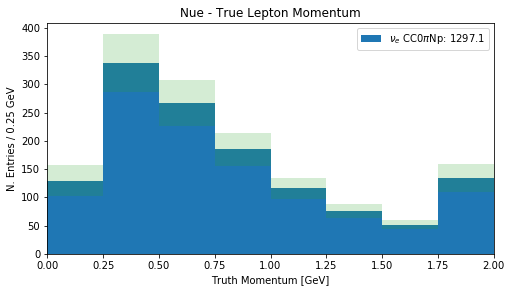

In [34]:
nue_fig

In [35]:
if isRun3 == False and isCombined == False:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_leptonMom_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_leptonMom_recoCut_run3_"+ending+".pdf")
elif isCombined == True:
    nue_fig.savefig("batch_nue_fig_full_500_catsel_nopions_leptonMom_recoCut_comb_"+ending+".svg",bbox_inches='tight')  

In [36]:
numu_bin_edges = np.arange(0, 2.25, 0.25)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])
numu_bin_size = [(numu_bin_edges[i + 1] - numu_bin_edges[i]) / 2
            for i in range(len(numu_bin_edges) - 1)]

numu_frac_err = np.nan_to_num(numu_exp_err / n_numu_tot)
print(numu_frac_err)
lower_err = np.nan_to_num(n_numu_tot-numu_exp_err)

numu_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

[0.19556035 0.15178335 0.16693967 0.16443998 0.16015505 0.15945002
 0.15280464 0.18726163]


<BarContainer object of 8 artists>

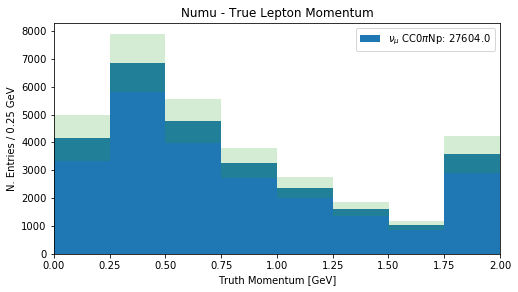

In [37]:
numu_fig

In [38]:
if isRun3 == False and isCombined == False:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_leptonMom_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_leptonMom_recoCut_run3_"+ending+".pdf") 
elif isCombined == True:
    numu_fig.savefig("batch_numu_fig_full_500_catsel_nopions_leptonMom_recoCut_comb_"+ending+".svg",bbox_inches='tight' ) 

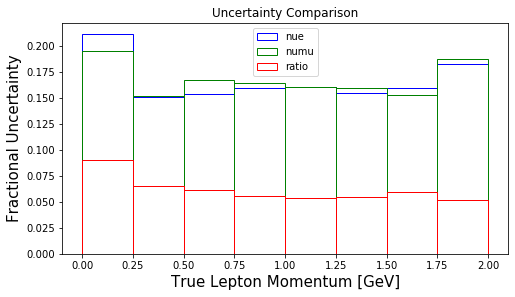

In [61]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 2.25, 0.25)
count = [0.1, 0.35, 0.6, 0.95, 1.1, 1.35, 1.6, 1.95]



sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('True Lepton Momentum [GeV]', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()
#errors_ax1.set_xlim([0, 5])
#errors_ax1.set_ylim([0, 1])

In [62]:
if isRun3 == False and isCombined == False:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_leptonMom_recoCut_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_leptonMom_recoCut_run3_"+ending+".pdf")
elif isCombined == True:
    errors_fig.savefig("batch_errors_fig_full_500_catsel_nopions_leptonMom_recoCut_comb_"+ending+".svg",bbox_inches='tight')  

## For Blockwise Unfolding

In [68]:
print("n_nue_tot", n_nue_tot)

n_nue_tot [ 48.22926162 123.92267406  97.80040563  63.64777416  36.91722153
  21.99581918  13.3538792   28.82391511]


In [69]:
print("n_numu_tot", n_numu_tot)

n_numu_tot [1570.06494352 2040.45136677 1319.071522   1007.60754779  786.30716831
  573.67302775  358.27851784  753.71647731]


In [70]:
nue_numu_tot = np.concatenate((n_nue_tot, n_numu_tot), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))


[  48.22926162  123.92267406   97.80040563   63.64777416   36.91722153
   21.99581918   13.3538792    28.82391511 1570.06494352 2040.45136677
 1319.071522   1007.60754779  786.30716831  573.67302775  358.27851784
  753.71647731]
16


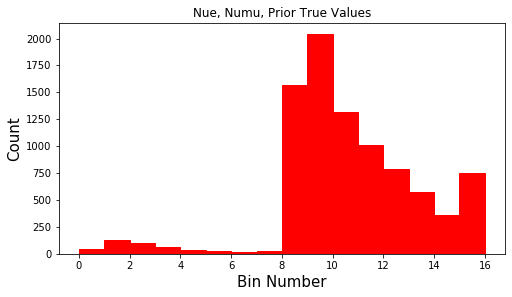

In [71]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])

bins = np.arange(0, 17, 1)
count = np.arange(0.0, 16.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Prior True Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("prior_true_input_leptonMom_comb_"+ending+".svg", bbox_inches='tight')

In [72]:
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_blockwise_recoCut_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_blockwise_recoCut_run3_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_leptonMom_usingSelection_prior_true_signal_blockwise_recoCut_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')    
